<h2> Prerequisite </h2>
- pip install torch    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
df = pd.read_csv("/Users/keremsmacbook/DataspellProjects/MultivariateForecasting/Data/SP500_Cleaned.csv")

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df.shape

(2764, 461)

In [6]:
df.head(10)

,Unnamed: 0,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0,27.283405,13.179525,16.769093,22.419830,26.000973,14.793333,56.624992,38.340000,34.286098,...,19.033312,95.529976,19.385836,56.165749,37.213242,23.749273,39.127857,60.207806,40.959999,17.587208
2013-01-03,1,27.381128,12.877850,16.557428,22.234699,26.990719,14.750000,56.419998,37.750000,33.732830,...,19.033312,96.557526,19.329191,56.064457,37.112217,23.671537,39.372551,61.070477,41.000000,17.611206
2013-01-04,2,27.921843,13.886581,16.096222,21.953815,26.828459,14.876667,56.731575,38.130001,33.132832,...,19.190020,97.722618,19.400000,56.324043,37.433651,23.637007,39.803684,61.381714,40.669998,18.115057
2013-01-07,3,27.719885,13.990280,16.001547,21.998503,27.047497,14.730000,56.485600,37.939999,33.234123,...,19.248785,98.054352,19.194668,55.671913,37.562252,23.326099,39.553158,61.532909,40.900002,18.027084
2013-01-08,4,27.498386,14.291961,16.044611,21.519714,27.055613,14.750000,56.813564,38.139999,32.891258,...,19.379377,97.973450,19.230074,56.020145,37.130569,23.041113,37.892735,61.621864,40.930000,17.667183
2013-01-09,5,28.241058,14.263677,15.793853,21.641014,27.234089,14.803333,57.215347,38.660000,32.805550,...,19.823374,98.321350,19.258394,55.804855,37.112217,23.403828,37.960068,62.760197,41.369999,17.475239
2013-01-10,6,28.449533,14.273106,15.989633,21.704851,27.461245,14.836667,56.715172,38.619999,33.202961,...,19.940905,99.437920,19.258394,56.412678,37.038750,23.731987,38.797516,62.884705,41.150002,17.555218
2013-01-11,7,28.293179,13.933719,15.891588,21.866341,27.184271,14.926667,57.297321,38.090000,32.930241,...,20.110674,99.510735,19.237150,56.735592,36.671391,23.472908,39.160606,63.293781,41.299999,17.395258
2013-01-14,8,28.364840,13.830017,15.325013,22.021378,27.176128,15.026667,57.280918,38.160000,32.914646,...,20.110674,99.356995,19.173429,56.716572,36.561184,23.498819,38.738945,63.187073,40.980000,17.483234


In [7]:
df.drop("Unnamed: 0", inplace = True, axis=1)

In [8]:
df.head(10)

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,27.283405,13.179525,16.769093,22.419830,26.000973,14.793333,56.624992,38.340000,34.286098,21.421146,...,19.033312,95.529976,19.385836,56.165749,37.213242,23.749273,39.127857,60.207806,40.959999,17.587208
2013-01-03,27.381128,12.877850,16.557428,22.234699,26.990719,14.750000,56.419998,37.750000,33.732830,21.249302,...,19.033312,96.557526,19.329191,56.064457,37.112217,23.671537,39.372551,61.070477,41.000000,17.611206
2013-01-04,27.921843,13.886581,16.096222,21.953815,26.828459,14.876667,56.731575,38.130001,33.132832,21.832092,...,19.190020,97.722618,19.400000,56.324043,37.433651,23.637007,39.803684,61.381714,40.669998,18.115057
2013-01-07,27.719885,13.990280,16.001547,21.998503,27.047497,14.730000,56.485600,37.939999,33.234123,20.928026,...,19.248785,98.054352,19.194668,55.671913,37.562252,23.326099,39.553158,61.532909,40.900002,18.027084
2013-01-08,27.498386,14.291961,16.044611,21.519714,27.055613,14.750000,56.813564,38.139999,32.891258,21.174585,...,19.379377,97.973450,19.230074,56.020145,37.130569,23.041113,37.892735,61.621864,40.930000,17.667183
2013-01-09,28.241058,14.263677,15.793853,21.641014,27.234089,14.803333,57.215347,38.660000,32.805550,21.279190,...,19.823374,98.321350,19.258394,55.804855,37.112217,23.403828,37.960068,62.760197,41.369999,17.475239
2013-01-10,28.449533,14.273106,15.989633,21.704851,27.461245,14.836667,56.715172,38.619999,33.202961,21.174585,...,19.940905,99.437920,19.258394,56.412678,37.038750,23.731987,38.797516,62.884705,41.150002,17.555218
2013-01-11,28.293179,13.933719,15.891588,21.866341,27.184271,14.926667,57.297321,38.090000,32.930241,21.174585,...,20.110674,99.510735,19.237150,56.735592,36.671391,23.472908,39.160606,63.293781,41.299999,17.395258
2013-01-14,28.364840,13.830017,15.325013,22.021378,27.176128,15.026667,57.280918,38.160000,32.914646,21.338957,...,20.110674,99.356995,19.173429,56.716572,36.561184,23.498819,38.738945,63.187073,40.980000,17.483234


In [9]:
scaler = MinMaxScaler(feature_range=(-1, 1))
all_data_normalized = []

In [10]:
class NBeatsBlock(nn.Module):
    def __init__(self, input_size, layer_size=64, output_size=None):
        super(NBeatsBlock, self).__init__()
        self.fc1 = nn.Linear(input_size, layer_size)
        self.fc2 = nn.Linear(layer_size, layer_size)
        self.fc3 = nn.Linear(layer_size, layer_size)
        self.fc4 = nn.Linear(layer_size, output_size if output_size is not None else input_size)
        self.output_size = output_size if output_size is not None else input_size

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        forecast = self.fc4(x)
        backcast = x[:, :self.output_size]
        return backcast, forecast

class NBeatsNet(nn.Module):
    def __init__(self, input_size, forecast_length, stack_types=[1, 1], nb_blocks_per_stack=4, layer_size=64, thetas_dim=[4, 8], share_weights_in_stack=False):
        super(NBeatsNet, self).__init__()
        self.input_size = input_size
        self.forecast_length = forecast_length
        self.stack_types = stack_types
        self.nb_blocks_per_stack = nb_blocks_per_stack

        blocks = []
        for stack_id in range(len(stack_types)):
            for block_id in range(nb_blocks_per_stack):
                block_init = NBeatsBlock(input_size=input_size, layer_size=layer_size, output_size=forecast_length) # Adjusted to use 'input_size'
                blocks.append(block_init)
        self.blocks = nn.ModuleList(blocks)

    def forward(self, x):
        forecast = torch.zeros(x.size(0), self.forecast_length, device=x.device)  # Adjusted to properly initialize the forecast tensor
        for block in self.blocks:
            backcast, block_forecast = block(x.view(x.size(0), -1))
            forecast += block_forecast.view(forecast.size())
        return forecast

In [11]:
def create_sequences(data, sequence_length, label):
    X, y, labels = [], [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
        labels.append(label)
    return np.array(X), np.array(y), np.array(labels)

In [12]:
sequence_length = 30
test_size = 0.2
validation_fraction = 0.1  

X_train_combined, y_train_combined, labels_train_combined = [], [], []
X_val_combined, y_val_combined, labels_val_combined = [], [], []
X_test_combined, y_test_combined, labels_test_combined = [], [], []

def create_sequences(data, sequence_length, label):
    X, y, labels = [], [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
        labels.append(label)
    return np.array(X), np.array(y), np.array(labels)

for idx, company in enumerate(df.columns):
    company_data = df[company].dropna().values.reshape(-1, 1)  

    scaler = MinMaxScaler(feature_range=(-1, 1))
    normalized_data = scaler.fit_transform(company_data)

    if len(normalized_data) <= sequence_length:
        print(f"Skipping {company}: Not enough data for sequence creation.")
        continue

    train_size = int(len(normalized_data) * (1 - test_size))
    train_data = normalized_data[:train_size]
    test_data = normalized_data[train_size - sequence_length:]  

    X_test_tmp, y_test_tmp, labels_test_tmp = create_sequences(test_data, sequence_length, idx)
    X_test_combined.extend(X_test_tmp)
    y_test_combined.extend(y_test_tmp)
    labels_test_combined.extend(labels_test_tmp)

    tscv = TimeSeriesSplit(n_splits=int(1 / validation_fraction))

    for train_idx, val_idx in tscv.split(train_data):
        X_train_tmp, y_train_tmp, labels_train_tmp = create_sequences(train_data[train_idx], sequence_length, idx)
        X_val_tmp, y_val_tmp, labels_val_tmp = create_sequences(train_data[val_idx], sequence_length, idx)

        X_train_combined.extend(X_train_tmp)
        y_train_combined.extend(y_train_tmp)
        labels_train_combined.extend(labels_train_tmp)

        X_val_combined.extend(X_val_tmp)
        y_val_combined.extend(y_val_tmp)
        labels_val_combined.extend(labels_val_tmp)

# Convert lists to numpy arrays
X_train_combined = np.array(X_train_combined)
y_train_combined = np.array(y_train_combined).reshape(-1, 1)
labels_train_combined = np.array(labels_train_combined)

X_val_combined = np.array(X_val_combined)
y_val_combined = np.array(y_val_combined).reshape(-1, 1)
labels_val_combined = np.array(labels_val_combined)

X_test_combined = np.array(X_test_combined)
y_test_combined = np.array(y_test_combined).reshape(-1, 1)
labels_test_combined = np.array(labels_test_combined)

# Print the shapes
print(f"X_train_combined shape: {X_train_combined.shape}")
print(f"y_train_combined shape: {y_train_combined.shape}")
print(f"labels_train_combined shape: {labels_train_combined.shape}")
print(f"X_val_combined shape: {X_val_combined.shape}")
print(f"y_val_combined shape: {y_val_combined.shape}")
print(f"labels_val_combined shape: {labels_val_combined.shape}")
print(f"X_test_combined shape: {X_test_combined.shape}")
print(f"y_test_combined shape: {y_test_combined.shape}")
print(f"labels_test_combined shape: {labels_test_combined.shape}")

X_train_combined shape: (4947300, 30, 1)
y_train_combined shape: (4947300, 1)
labels_train_combined shape: (4947300,)
X_val_combined shape: (786600, 30, 1)
y_val_combined shape: (786600, 1)
labels_val_combined shape: (786600,)
X_test_combined shape: (254380, 30, 1)
y_test_combined shape: (254380, 1)
labels_test_combined shape: (254380,)


In [13]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

def batch_convert_to_tensor(data, batch_size=1000, dtype=torch.float32):
    tensor_chunks = []
    for i in tqdm(range(0, len(data), batch_size)):
        batch = data[i:i+batch_size]
        tensor = torch.tensor(batch, dtype=dtype)
        tensor_chunks.append(tensor)
    return torch.cat(tensor_chunks, dim=0)

# Convert training and validation data to tensors
X_train_tensor = batch_convert_to_tensor(X_train_combined, batch_size=1000)
y_train_tensor = batch_convert_to_tensor(y_train_combined, batch_size=1000)
X_val_tensor = batch_convert_to_tensor(X_val_combined, batch_size=1000)
y_val_tensor = batch_convert_to_tensor(y_val_combined, batch_size=1000)

100%|██████████| 787/787 [00:00<00:00, 226400.36it/s]


In [14]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import os
import psutil  # To monitor system resources

model = NBeatsNet(input_size=X_train_combined.shape[1], forecast_length=1, layer_size=128)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
patience = 10
epochs = 100
batch_size = 1000
best_val_loss = float('inf')
epochs_no_improve = 0

total_batches = (X_train_tensor.size(0) + batch_size - 1) // batch_size  # Total number of batches
print("Starting the model training")

for epoch in range(epochs):
    start_time = time.time()
    print(f"\nEpoch {epoch+1}/{epochs}")
    model.train()
    total_loss = 0

    for i in range(0, X_train_tensor.size(0), batch_size):
        batch_num = i // batch_size + 1
        X_batch = X_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]

        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if batch_num % 100 == 0 or batch_num == total_batches:
            print(f"Epoch {epoch+1}, Batch {batch_num}/{total_batches}, Batch loss: {loss.item()}")
            print(f"Memory Usage: {psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2:.2f} MB")

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1} completed in {epoch_time:.2f} seconds, Total Training Loss: {total_loss / total_batches}")

    if epoch % 10 == 0 or epochs_no_improve >= patience:
        model.eval()
        val_losses = []
        val_start_time = time.time()

        for i in range(0, X_val_tensor.size(0), batch_size):
            X_val_batch = X_val_tensor[i:i + batch_size]
            y_val_batch = y_val_tensor[i:i + batch_size]

            val_output = model(X_val_batch)
            val_loss = criterion(val_output, y_val_batch)
            val_losses.append(val_loss.item())

        avg_val_loss = np.mean(val_losses)
        val_time = time.time() - val_start_time
        print(f'Validation completed in {val_time:.2f} seconds, Average Validation Loss: {avg_val_loss}')

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_no_improve = 0
            # Save the model checkpoint
            torch.save(model.state_dict(), 'model_checkpoint.pth')
            print("Model improved and saved.")
        else:
            epochs_no_improve += 1
            print("No improvement in model.")

        if epochs_no_improve >= patience:
            print(f'Stopping early at epoch {epoch+1} due to no improvement in validation loss.')
            break


Starting the model training

Epoch 1/100
Epoch 1, Batch 100/4948, Batch loss: 0.001413231366313994
Memory Usage: 2543.59 MB
Epoch 1, Batch 200/4948, Batch loss: 0.00022741266002412885
Memory Usage: 2403.69 MB
Epoch 1, Batch 300/4948, Batch loss: 0.001555035007186234
Memory Usage: 2421.95 MB
Epoch 1, Batch 400/4948, Batch loss: 0.00035302885225974023
Memory Usage: 2434.70 MB
Epoch 1, Batch 500/4948, Batch loss: 0.0001084524265024811
Memory Usage: 2447.03 MB
Epoch 1, Batch 600/4948, Batch loss: 0.0009141748305410147
Memory Usage: 2459.36 MB
Epoch 1, Batch 700/4948, Batch loss: 0.00011800937500083819
Memory Usage: 2451.95 MB
Epoch 1, Batch 800/4948, Batch loss: 0.00018084245675709099
Memory Usage: 2283.03 MB
Epoch 1, Batch 900/4948, Batch loss: 0.0009326428989879787
Memory Usage: 2243.47 MB
Epoch 1, Batch 1000/4948, Batch loss: 0.00011829907452920452
Memory Usage: 2256.67 MB
Epoch 1, Batch 1100/4948, Batch loss: 0.0012377171078696847
Memory Usage: 2268.50 MB
Epoch 1, Batch 1200/4948, Batc

In [24]:
results = []
model.eval()  # Switch to evaluation mode

for idx, company in enumerate(df.columns):
    # Find indices for the current company in the test dataset
    company_test_indices = labels_test_combined == idx
    if not np.any(company_test_indices):
        print(f"Skipping {company} due to no test data.")
        continue

    X_test_company = X_test_combined[company_test_indices]
    y_test_company = y_test_combined[company_test_indices]

    # Convert to PyTorch tensors
    X_test_tensor = torch.tensor(X_test_company, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test_company, dtype=torch.float32)

    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_loss = criterion(test_output, y_test_tensor.view(-1, 1))
        rmse = torch.sqrt(test_loss)

        # Convert tensors to numpy arrays for MAE and MAPE calculations
        test_output_np = test_output.numpy()
        y_test_np = y_test_tensor.numpy()

        mae = np.mean(np.abs(test_output_np - y_test_np))
        mape = np.mean(np.abs((test_output_np - y_test_np) / y_test_np)) * 100 if np.any(y_test_np) else float('nan')

    print(f"{company}: RMSE={rmse.item()}, MAE={mae}, MAPE={mape}%")
    results.append({'Company': company, 'RMSE': rmse.item(), 'MAE': mae, 'MAPE': mape})


A: RMSE=0.036910660564899445, MAE=0.028544999659061432, MAPE=10.017461329698563%
AAL: RMSE=0.019661439582705498, MAE=0.01440964825451374, MAPE=2.034720778465271%
AAPL: RMSE=0.04166710749268532, MAE=0.03225204721093178, MAPE=5.439389497041702%
ABBV: RMSE=0.03779784217476845, MAE=0.029392343014478683, MAPE=4.487305134534836%
ABT: RMSE=0.03339433670043945, MAE=0.025164322927594185, MAPE=5.492720752954483%
ACGL: RMSE=0.03295241668820381, MAE=0.022761845961213112, MAPE=8.719033002853394%
ACN: RMSE=0.0350993312895298, MAE=0.025914296507835388, MAPE=7.840503752231598%
ADBE: RMSE=0.04043014347553253, MAE=0.02895490452647209, MAPE=158.67490768432617%
ADI: RMSE=0.04601228982210159, MAE=0.03609092906117439, MAPE=6.7498356103897095%
ADM: RMSE=0.041600197553634644, MAE=0.03077520802617073, MAPE=7.313662767410278%
ADP: RMSE=0.03851333260536194, MAE=0.029384944587945938, MAPE=4.563738778233528%
ADSK: RMSE=0.04117082059383392, MAE=0.02949894778430462, MAPE=98.75063300132751%
AEE: RMSE=0.04162093251943

In [25]:
results_df = pd.DataFrame(results, columns=['Company Name', 'RMSE', 'MAE', 'MAPE'])

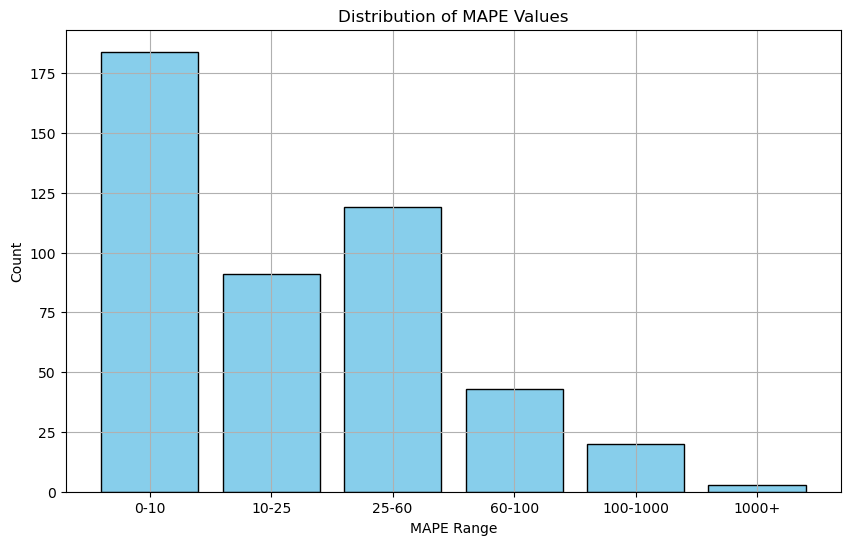

In [27]:
# Extract MAPE values from results list
mapes = [result['MAPE'] for result in results]

# Define ranges
ranges = [(0, 10), (10, 25), (25, 60), (60, 100), (100,1000), (1000, float('inf'))]

# Initialize count for each range
counts = [0] * len(ranges)

# Count the number of data points in each range
for mape in mapes:
    for i, (start, end) in enumerate(ranges):
        if start <= mape < end:
            counts[i] += 1
            break
    else:
        counts[-1] += 1  # For values above 100

# Define range labels
range_labels = ['0-10', '10-25', '25-60', '60-100', '100-1000', '1000+']

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(ranges)), counts, color='skyblue', edgecolor='black')
plt.xticks(range(len(ranges)), range_labels)
plt.title('Distribution of MAPE Values')
plt.xlabel('MAPE Range')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [29]:
results_df.to_excel('/Users/keremsmacbook/DataspellProjects/MultivariateForecasting/OutputData/S&P500_NBeats_V0.2.xlsx', index=False)